In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from plotnine import *
from sklearn.metrics import silhouette_score

(-0.5, 639.5, 426.5, -0.5)

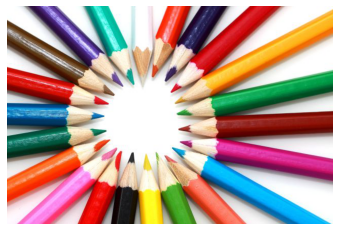

In [ ]:
pencils = plt.imread("pencils.jpg", format = "jpg")
plt.imshow(pencils)
plt.axis("off")

In [ ]:
pencils.shape
pencils_flat = pencils.reshape(-1,3)
pencils_flat.shape

(273280, 3)

In [ ]:
pencils_flat

array([[255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       ...,
       [216, 255, 252],
       [243, 255, 242],
       [255, 255, 236]], dtype=uint8)

In [ ]:
df = pd.DataFrame(pencils_flat, columns=['R', 'G', 'B'])
df

,R,G,B
0,255,255,255
1,255,255,255
2,255,255,255
3,255,255,255
4,255,255,255
...,...,...,...
273275,104,203,232
273276,167,235,248
273277,216,255,252
273278,243,255,242


In [ ]:
# inercja
ks = range(2,20)
inercje = []

for i in ks:
  km = KMeans(n_clusters= i).fit(df[['R', 'G', 'B']])
  inercje.append(km.inertia_)

In [ ]:
inercje_df = pd.DataFrame({'K' : ks, 'Inercja': inercje})
inercje_df

,K,Inercja
0,2,2.771802e+09
1,3,1.821639e+09
2,4,1.381154e+09
3,5,1.042960e+09
4,6,8.829595e+08
5,7,7.670729e+08
6,8,6.560005e+08
7,9,5.855813e+08
8,10,5.211253e+08
9,11,4.724024e+08


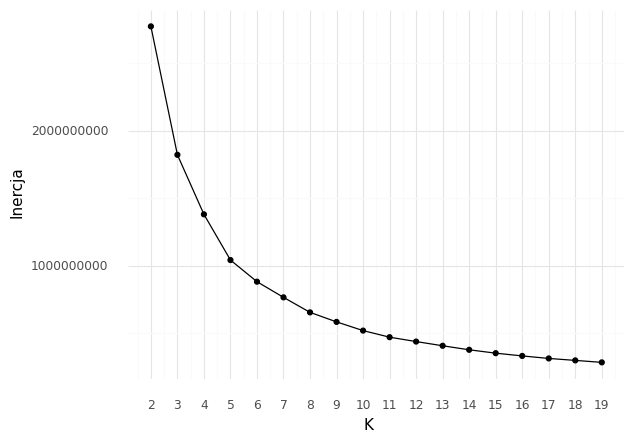

<ggplot: (8781607727817)>

In [ ]:
(ggplot(inercje_df, aes(x='K', y='Inercja'))+ 
 geom_point() + geom_line() +
 scale_x_continuous(breaks = ks) +
 theme_minimal()
)

Na podstawie wykresu inercji można wywnioskować, że do odrysowania obrazu powinno wystarczyć 5 kolorów, ponieważ zmiany po 5 iteracji są znacznie mniejsze niż wcześniesze. Widać także, że 5 kolorów stanowi mniej niż 60% wszystkich kolorów, więc obraz nie będzie odwzorowany w zadowalającym stopniu. Jeżeli chcemy uzyskać odrysowany obraz zbliżony do pierwotnego należy wykorzystać więcej kolorów.

In [ ]:
# Silhouette

ks = range(2,3)
silh = []

for i in ks:
  km = KMeans(n_clusters= i).fit(df[['R', 'G', 'B']])
  silh.append(silhouette_score(df[['R', 'G', 'B']], km.predict(df[['R', 'G', 'B']])))

In [ ]:
silh_df = pd.DataFrame({'K' : ks, 'Sylwetka': silh})
silh_df

,K,Sylwetka
0,2,0.50569


/usr/local/lib/python3.7/dist-packages/plotnine/geoms/geom_path.py:83: PlotnineWarning: geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?


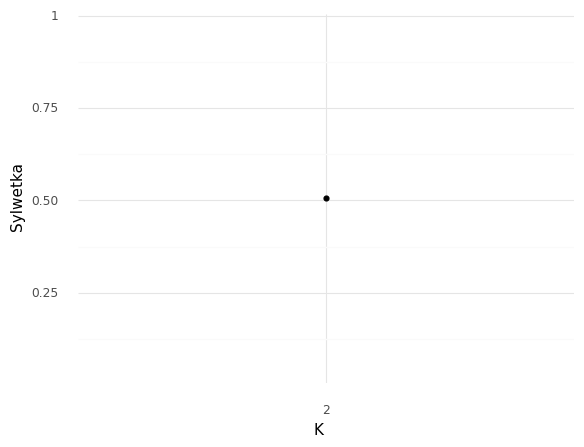

<ggplot: (8781607653269)>

In [ ]:
(ggplot(silh_df, aes(x='K', y='Sylwetka'))+ 
 geom_point() + geom_line() +
 scale_x_continuous(breaks = ks) +
 theme_minimal()
)

Algorytm Silhouette nie jest odpowiednim wyborem do wyznaczenia liczby kolorów potrzebnych do odwzrorowania obrazka. Algorytm ten wymaga zbyt dużo czasu na przeprowadzenie 20 iteracji, a i tak nie mamy pewności, czy taka liczba iteracji będzie wystarczająca. 

(-0.5, 639.5, 426.5, -0.5)

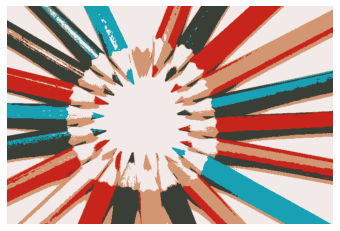

In [ ]:
# 5 kolorów

km_pencils = KMeans(n_clusters=5, random_state=0)
km_pencils.fit(pencils_flat)
km_pencils.cluster_centers_
pencils_copy = pencils_flat.copy()

for i in np.unique(km_pencils.labels_):
  pencils_copy[km_pencils.labels_ == i, :] = km_pencils.cluster_centers_[i]

pencils_5 = pencils_copy.reshape(pencils.shape)
plt.imshow(pencils_5)
plt.axis('off')

(-0.5, 639.5, 426.5, -0.5)

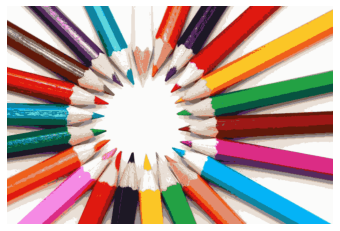

In [ ]:
# 20 kolorów

km_pencils_20 = KMeans(n_clusters=20, random_state=0)
km_pencils_20.fit(pencils_flat)
km_pencils_20.cluster_centers_
pencils_20 = pencils_flat.copy()

for i in np.unique(km_pencils_20.labels_):
  pencils_20[km_pencils_20.labels_ == i, :] = km_pencils_20.cluster_centers_[i]

pencils_20 = pencils_20.reshape(pencils.shape)
plt.imshow(pencils_20)
plt.axis('off')

Jak widać na dwóch powyższych obrazach, mimo iż zmiany wartości inercji po 5 iteracji znacząco się zmniejszają, to obrazek odwzorowany 5 kolorami na pewno nie przypomina pierwotnego zdjęcia w stopniu zadowalającym. Obraz odrysowany z wykorzystaniem 20 kolorów jest dużo bardziej zadowalający.   